In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

In [ ]:
df = pd.read_csv('hotel_bookings_clean.csv')

In [ ]:
df.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'required_car_parking_spaces',
       'total_of_special_requests', 'avg_daily_rate', 'booked_by_company',
       'booked_by_agent', 'hotel_City', 'hotel_Resort', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_No_meal', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline_TA_TO', 'market_segment_Online_TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA_TO', 'distribution_channel_Undefined',
       'reserved_room_type_A', 'reserved_room_type_B', 'reserved

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,avg_daily_rate,booked_by_company,booked_by_agent,hotel_City,hotel_Resort,meal_BB,meal_FB,meal_HB,meal_No_meal,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline_TA_TO,market_segment_Online_TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA_TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,7,0,0,2,0,0,0,0,0,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,737,27,1,7,0,0,2,0,0,0,0,0,0,0.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,7,27,1,7,0,1,1,0,0,0,0,0,0,75.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,13,27,1,7,0,1,1,0,0,0,0,0,0,75.0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,14,27,1,7,0,2,2,0,0,0,0,0,1,98.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
# Check if there are any null values
print(df.isnull().sum())

is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
required_car_parking_spaces       0
total_of_special_requests         0
avg_daily_rate                    0
booked_by_company                 0
booked_by_agent                   0
hotel_City                        0
hotel_Resort                      0
meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_No_meal                      0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct             0
market_segment_Groups       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119210 non-null  int64  
 1   lead_time                       119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   arrival_date_month              119210 non-null  int64  
 5   stays_in_weekend_nights         119210 non-null  int64  
 6   stays_in_week_nights            119210 non-null  int64  
 7   adults                          119210 non-null  int64  
 8   babies                          119210 non-null  int64  
 9   is_repeated_guest               119210 non-null  int64  
 10  previous_cancellations          119210 non-null  int64  
 11  previous_bookings_not_canceled  119210 non-null  int64  
 12  required_car_par

In [ ]:
# Split the data into two DataFrames: X (features) and y (target variable)
X = df.iloc[:, 1:]  # Specify at least two columns as features
y = df["is_canceled"]  # Specify one column as the target variable

# Split the data into train and test subsets
# You can adjust the test size and random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=123
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83447, 51), (35763, 51), (83447,), (35763,))

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 6,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.01,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8002125101361742


[Text(0.6, 0.9166666666666666, 'deposit_type_Non_Refund <= 0.5\ngini = 0.467\nsamples = 83447\nvalue = [52462, 30985]'),
 Text(0.4, 0.75, 'lead_time <= 11.5\ngini = 0.407\nsamples = 73198\nvalue = [52398, 20800]'),
 Text(0.2, 0.5833333333333334, 'gini = 0.196\nsamples = 16522\nvalue = [14705, 1817]'),
 Text(0.6, 0.5833333333333334, 'previous_cancellations <= 0.5\ngini = 0.446\nsamples = 56676\nvalue = [37693, 18983]'),
 Text(0.4, 0.4166666666666667, 'market_segment_Online_TA <= 0.5\ngini = 0.433\nsamples = 55098\nvalue = [37607, 17491]'),
 Text(0.2, 0.25, 'gini = 0.302\nsamples = 23483\nvalue = [19136, 4347]'),
 Text(0.6, 0.25, 'total_of_special_requests <= 0.5\ngini = 0.486\nsamples = 31615\nvalue = [18471, 13144]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.466\nsamples = 11479\nvalue = [4252, 7227]'),
 Text(0.8, 0.08333333333333333, 'gini = 0.415\nsamples = 20136\nvalue = [14219, 5917]'),
 Text(0.8, 0.4166666666666667, 'gini = 0.103\nsamples = 1578\nvalue = [86, 1492]'),
 Text(0.8, 

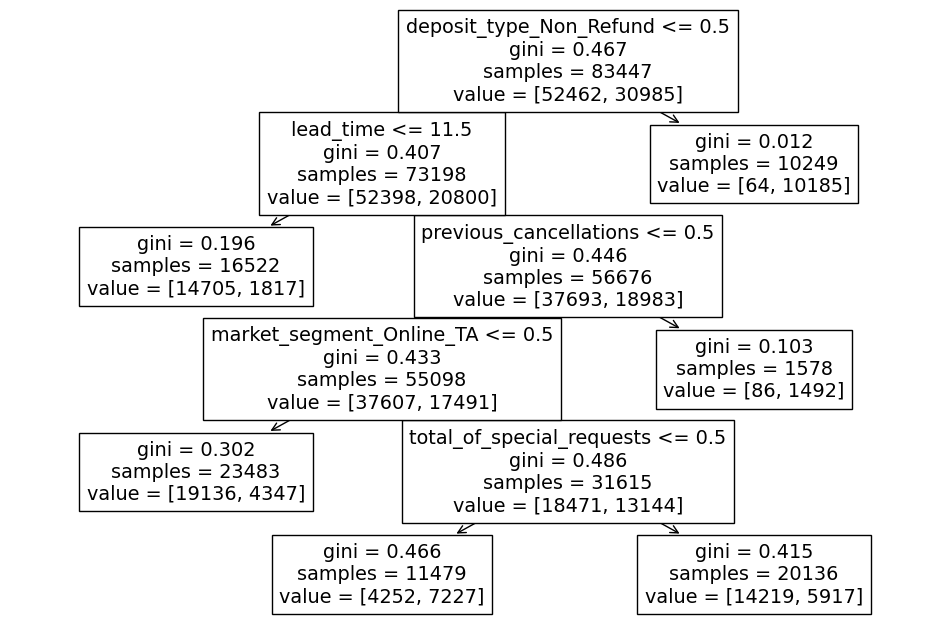

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns)

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 3,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.01,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.76618292648827


[Text(0.6, 0.875, 'deposit_type_Non_Refund <= 0.5\ngini = 0.467\nsamples = 83447\nvalue = [52462, 30985]'),
 Text(0.4, 0.625, 'lead_time <= 11.5\ngini = 0.407\nsamples = 73198\nvalue = [52398, 20800]'),
 Text(0.2, 0.375, 'gini = 0.196\nsamples = 16522\nvalue = [14705, 1817]'),
 Text(0.6, 0.375, 'previous_cancellations <= 0.5\ngini = 0.446\nsamples = 56676\nvalue = [37693, 18983]'),
 Text(0.4, 0.125, 'gini = 0.433\nsamples = 55098\nvalue = [37607, 17491]'),
 Text(0.8, 0.125, 'gini = 0.103\nsamples = 1578\nvalue = [86, 1492]'),
 Text(0.8, 0.625, 'gini = 0.012\nsamples = 10249\nvalue = [64, 10185]')]

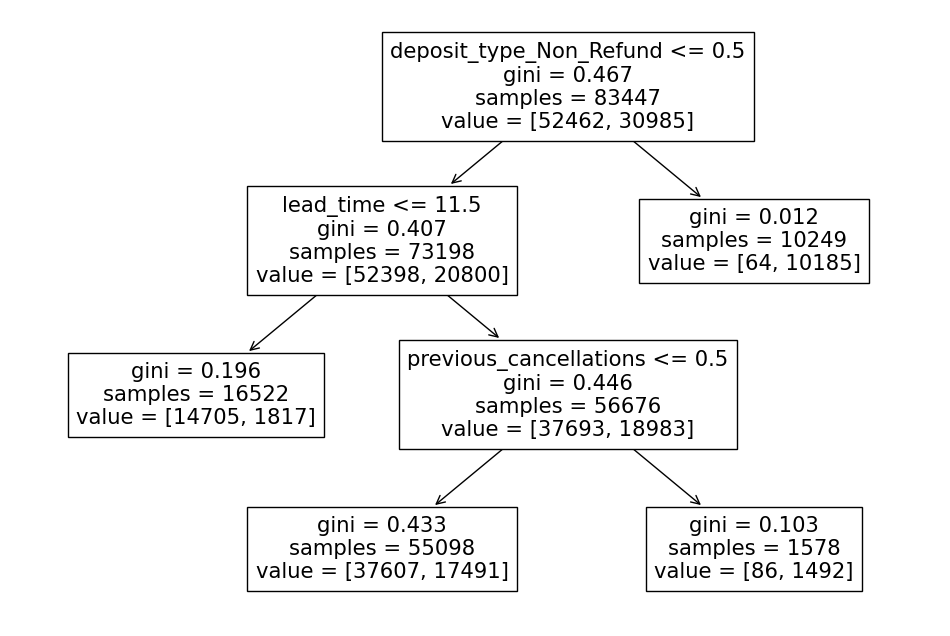

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns)

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "entropy",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 6,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.01,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7995973492156698


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define parameters for the RandomForestClassifier
rf_params = {
    "n_estimators": 100,  # Number of trees in the forest
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 6,  # Max depth of the trees
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.01,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a RandomForestClassifier object with the parameters above
rf_clf = RandomForestClassifier(**rf_params)

# Train the random forest classifier on the train set
rf_clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred_rf = rf_clf.predict(X_test)


In [ ]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7595280038028129


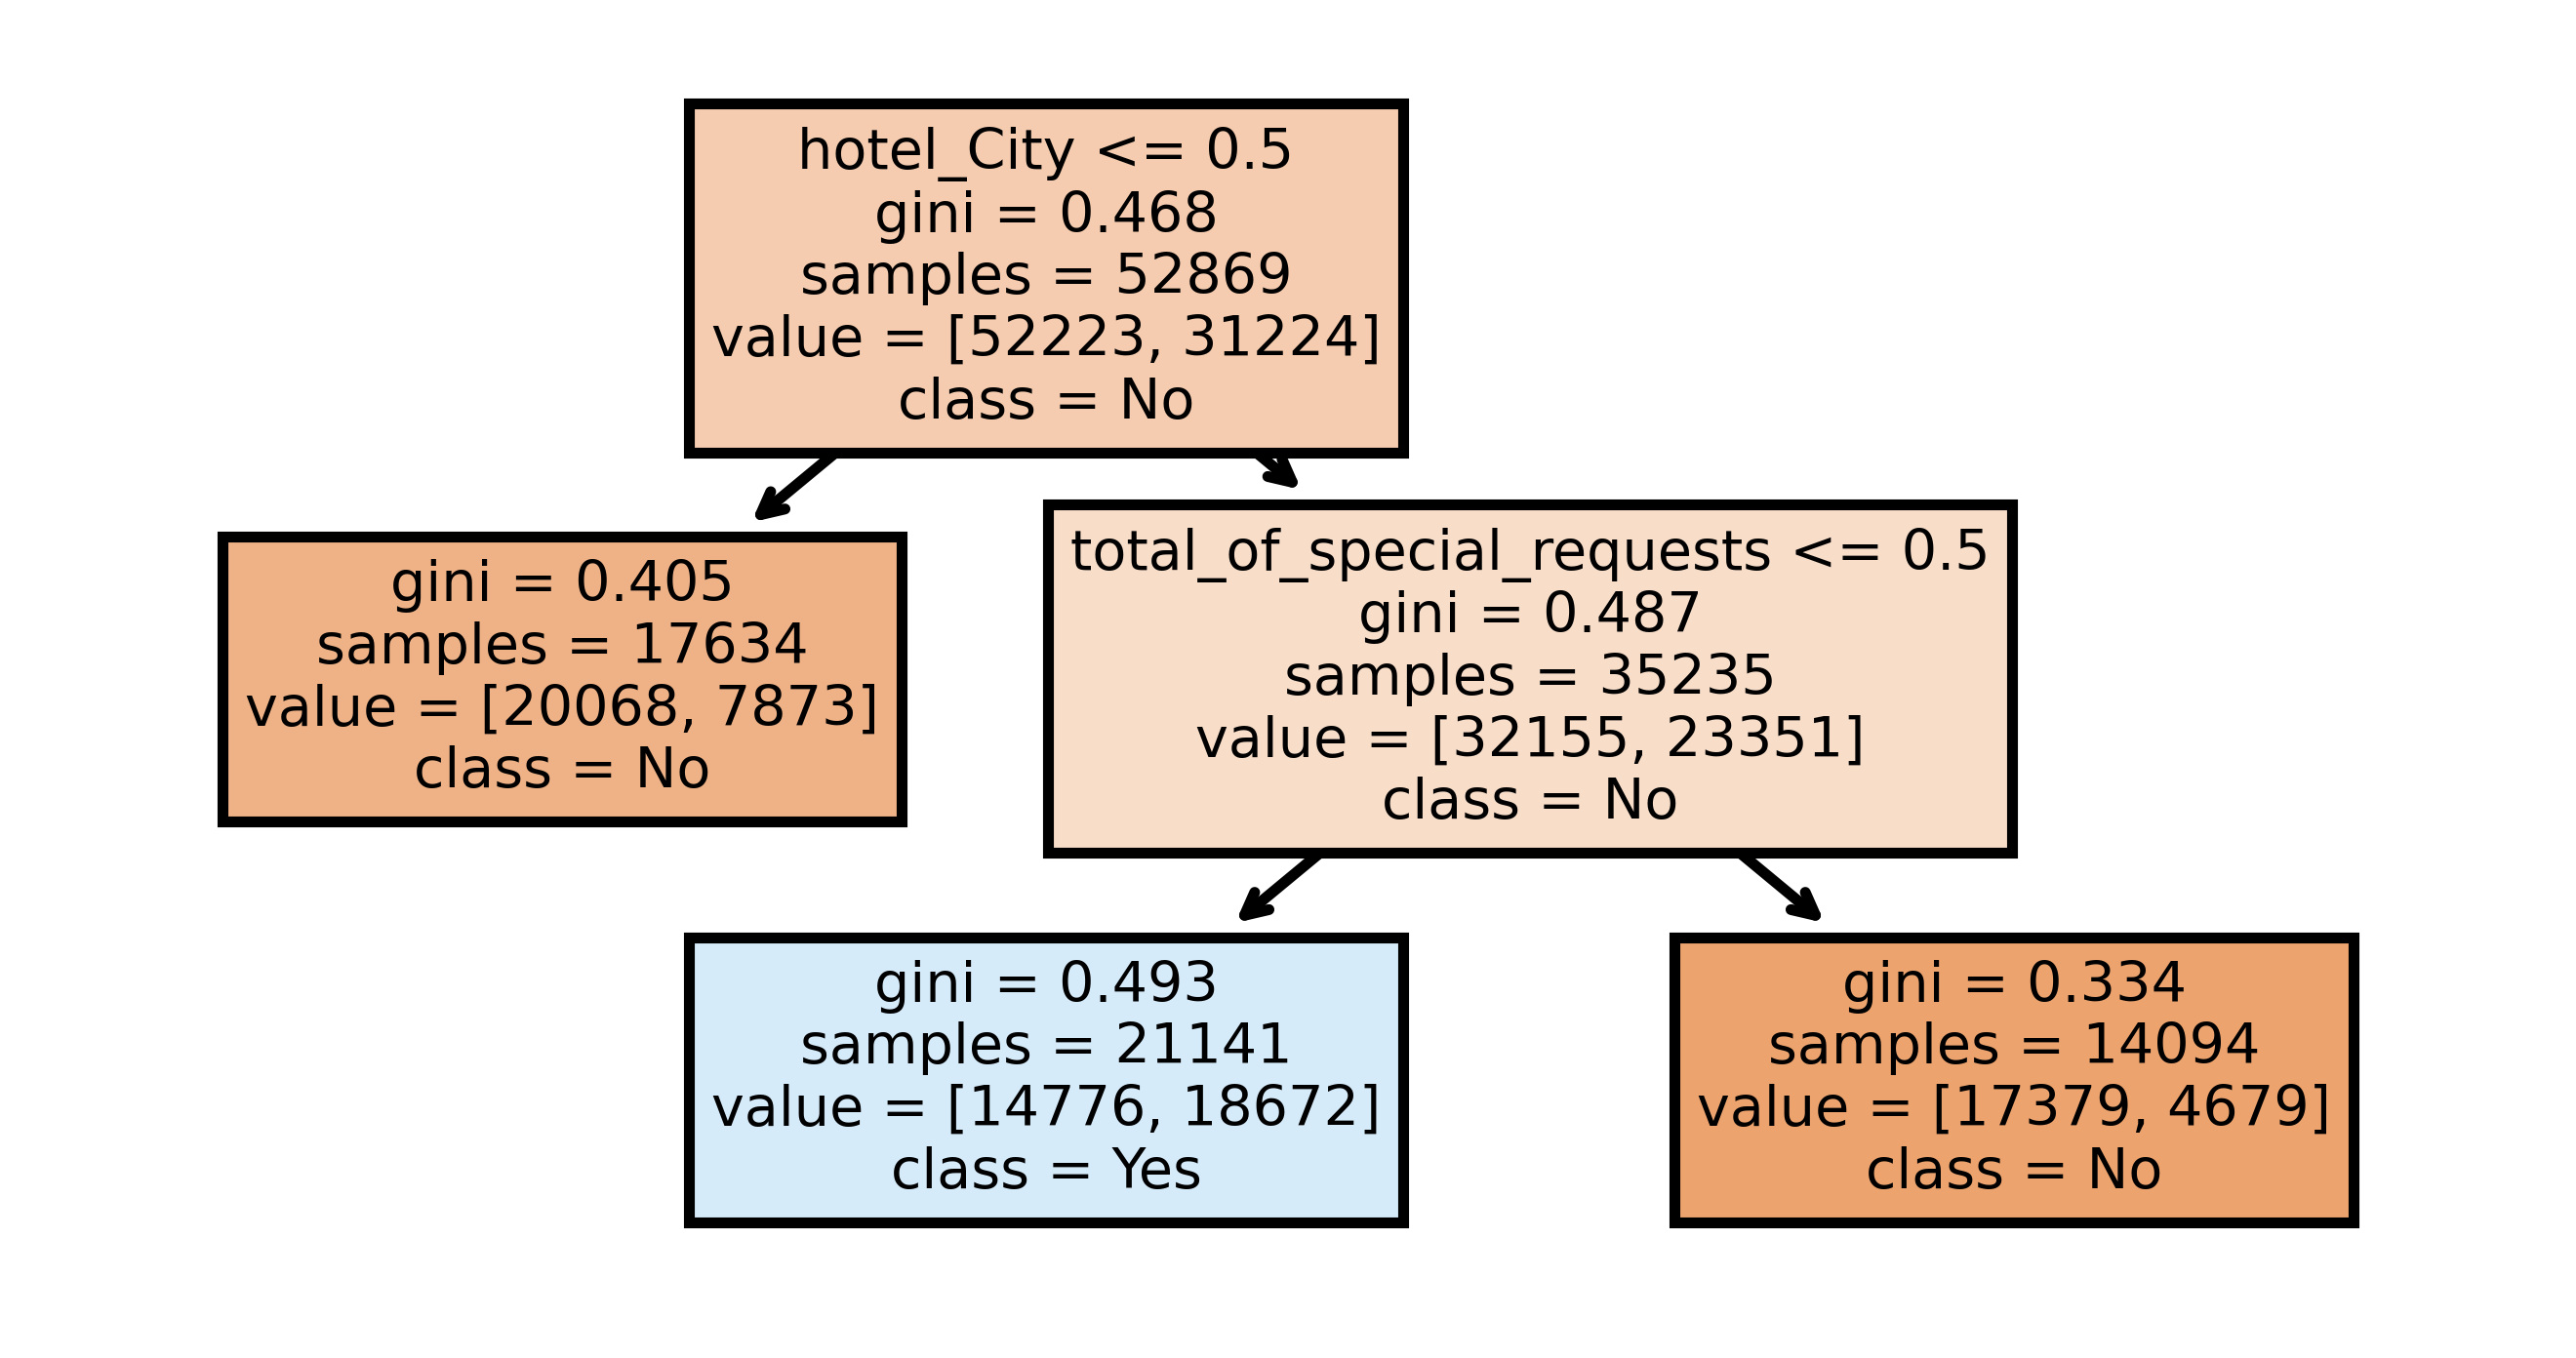

In [ ]:
fn = X.columns.tolist()
cn = df['is_canceled'].map({0: 'No', 1: 'Yes'}).unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2), dpi=800)
tree.plot_tree(rf_clf.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

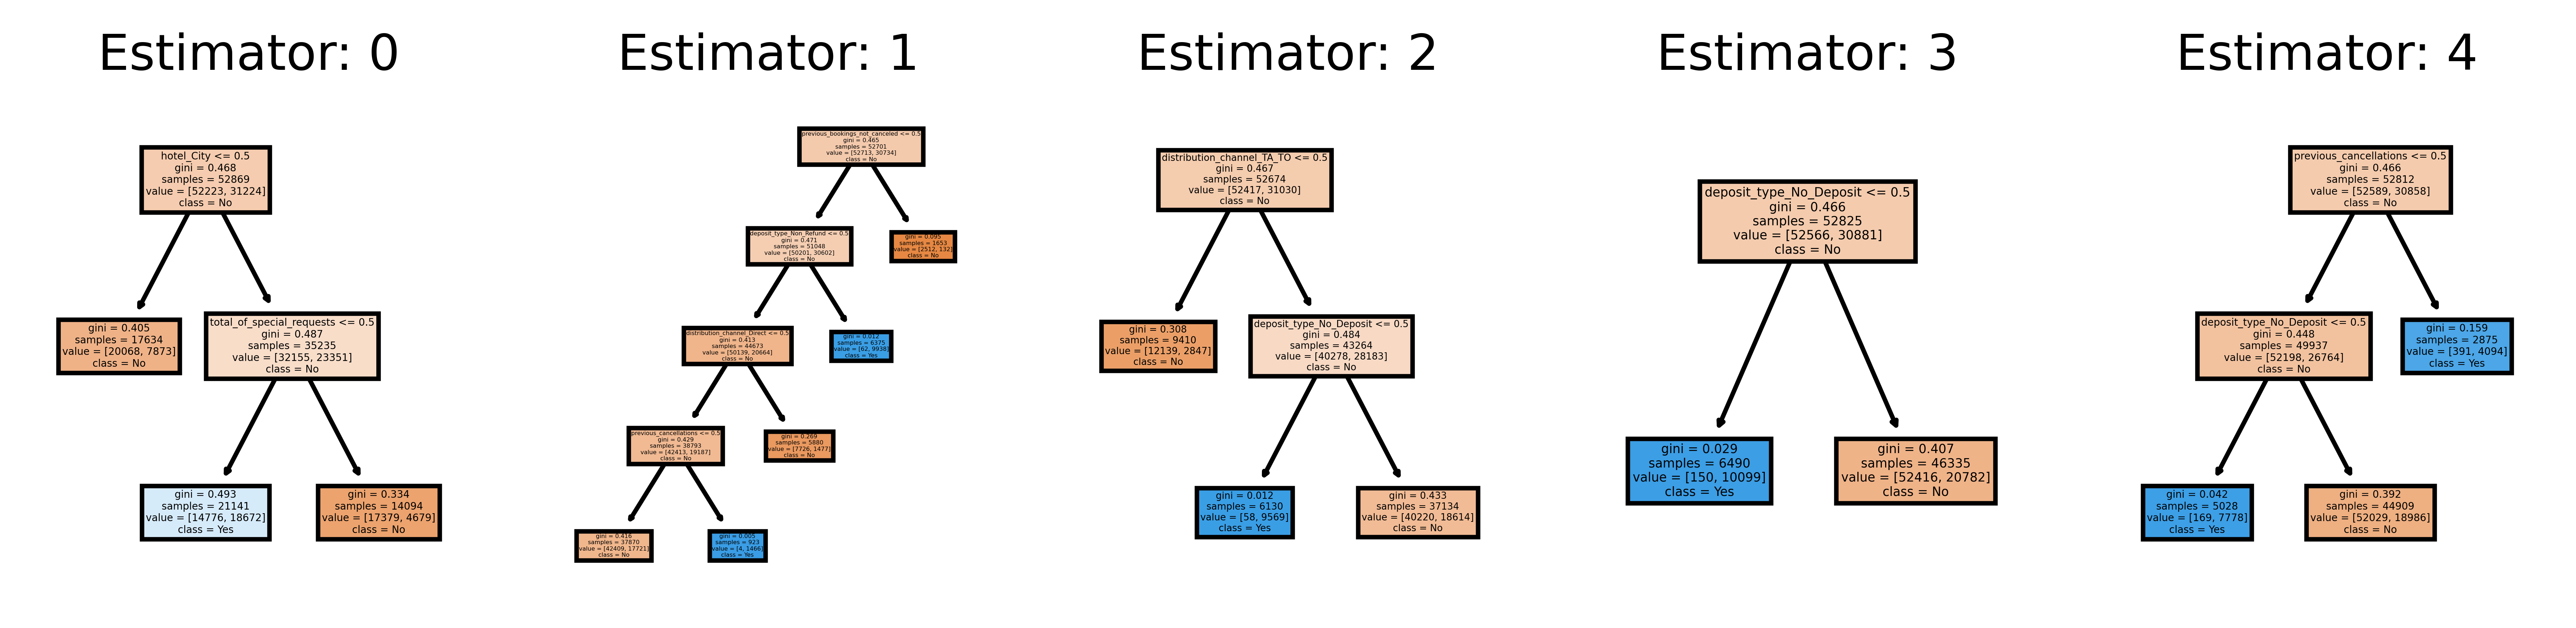

In [ ]:
fn = X.columns.tolist()
cn = df['is_canceled'].map({0: 'No', 1: 'Yes'}).unique()
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf_clf.estimators_[index],
                   feature_names = fn,
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [ ]:
# Define a parameter grid with distributions of possible parameters to use
rs_param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list((range(3, 12))),
    "min_samples_split": list((range(2, 5))),
    "min_samples_leaf": list((range(1, 5))),
    "ccp_alpha": [0, 0.001, 0.01, 0.1],
}

# Create a decision tree classifer object
clf = DecisionTreeClassifier(random_state=123)

# Instantiate RandomizedSearchCV() with clf and the parameter grid
clf_rs = RandomizedSearchCV(
    estimator=clf,
    param_distributions=rs_param_grid,
    cv=3,  # Number of folds
    n_iter=10,  # Number of parameter candidate settings to sample
    verbose=2,  # The higher this is, the more messages are outputed
    random_state=123,
)

# Train the model on the training set
clf_rs.fit(X_train, y_train)

# Print the best parameters and highest accuracy
print("Best parameters found: ", clf_rs.best_params_)
print("Best accuracy found: ", clf_rs.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.3s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.3s
[CV] END ccp_alpha=0.1, criterion=entropy, max_depth=7, min_samples_leaf=4, min_samples_split=3; total time=   0.3s
[CV] END ccp_alpha=0.01, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END ccp_alpha=0.01, criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=2; total time=   0.2s
[CV] END 

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 9,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 2,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.001,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8116209490255292


In [ ]:
import pandas as pd

# Assuming X_test is a DataFrame and y_test, y_pred are pandas Series

# Convert y_pred to a pandas Series if it's not already
y_pred = pd.Series(y_pred, name='Predicted')

# Concatenate X_test, y_test, and y_pred along the columns
result_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), y_pred], axis=1)

# Display the DataFrame
print(result_df)


       lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             30                         5                         30   
1            224                        28                         11   
2             83                        23                          4   
3             79                         4                         26   
4            116                        33                         11   
...          ...                       ...                        ...   
35758         24                        43                         22   
35759          0                         4                         19   
35760        209                        27                          2   
35761         34                        50                          8   
35762         15                        18                         28   

       arrival_date_month  stays_in_weekend_nights  stays_in_week_nights  \
0                       1                      

In [ ]:
display(result_df)

,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,...,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,is_canceled,Predicted
0,30,5,30,1,1,4,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,224,28,11,7,0,4,2,0,0,0,...,0,1,0,0,0,0,1,0,1,1
2,83,23,4,6,2,2,2,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,79,4,26,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,116,33,11,8,2,4,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35758,24,43,22,10,0,3,2,0,0,0,...,0,1,0,0,0,0,0,1,0,0
35759,0,4,19,1,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
35760,209,27,2,7,2,4,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0
35761,34,50,8,12,0,2,1,0,0,1,...,0,0,1,0,0,0,1,0,1,1


In [ ]:
import pandas as pd



# Provided dictionary with values as lists
data_dict = {
    'lead_time': [342, 737, 13],
    'arrival_date_week_number': [27, 27, 27],
    'arrival_date_day_of_month': [1, 1, 1],
    'arrival_date_month': [7, 7, 7],
    'stays_in_weekend_nights': [0, 0, 0],
    'stays_in_week_nights': [0, 0, 1],
    'adults': [2, 2, 2],
    'babies': [0, 0, 0],
    'is_repeated_guest': [0, 0, 0],
    'previous_cancellations': [0, 0, 0],
    'previous_bookings_not_canceled': [0, 0, 0],
    'required_car_parking_spaces': [0, 0, 0],
    'total_of_special_requests': [0, 0, 0],
    'avg_daily_rate': [0.0, 0.0, 75.0],
    'booked_by_company': [0, 0, 0],
    'booked_by_agent': [0, 0, 1],
    'hotel_City': [0, 0, 1],
    'hotel_Resort': [0, 1, 0],
    'meal_BB': [1, 1, 1],
    'meal_FB': [1, 1, 0],
    'meal_HB': [0, 0, 0],
    'meal_No_meal': [0, 0, 0],
    'market_segment_Aviation': [0, 0, 0],
    'market_segment_Complementary': [0, 0, 0],
    'market_segment_Corporate': [0, 0, 0],
    'market_segment_Direct': [0, 0, 0],
    'market_segment_Groups': [1, 1, 1],
    'market_segment_Offline_TA_TO': [0, 0, 0],
    'market_segment_Online_TA': [0, 0, 0],
    'market_segment_Undefined': [0, 0, 0],
    'distribution_channel_Corporate': [0, 0, 0],
    'distribution_channel_Direct': [0, 0, 1],
    'distribution_channel_GDS': [1, 1, 0],
    'distribution_channel_TA_TO': [0, 0, 0],
    'distribution_channel_Undefined': [0, 0, 0],
    'reserved_room_type_A': [0, 0, 0],
    'reserved_room_type_B': [0, 0, 0],
    'reserved_room_type_C': [0, 0, 0],
    'reserved_room_type_D': [1, 1, 1],
    'reserved_room_type_E': [0, 0, 0],
    'reserved_room_type_F': [0, 0, 0],
    'reserved_room_type_G': [0, 0, 0],
    'reserved_room_type_H': [0, 0, 0],
    'reserved_room_type_L': [0, 0, 0],
    'deposit_type_No_Deposit': [0, 0, 0],
    'deposit_type_Non_Refund': [1, 1, 1],
    'deposit_type_Refundable': [0, 0, 0],
    'customer_type_Contract': [0, 0, 0],
    'customer_type_Group': [0, 0, 0],
    'customer_type_Transient': [0, 0, 1],
    'customer_type_Transient-Party': [0, 0, 0]
}



In [ ]:
import pandas as pd
temp = pd.DataFrame.from_dict(data_dict)

In [ ]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "criterion": "gini",  # Function to measure the quality of a split: 'Gini' or 'Entropy'
    "max_depth": 9,  # Max depth of the tree
    "min_samples_split": 2,  # Min number of samples required to split a node
    "min_samples_leaf": 2,  # Min number of samples required at a leaf node
    "ccp_alpha": 0.001,  # Cost complexity parameter for pruning
    "random_state": 123,
}

# Create a DecisionTreeClassifier object with the parameters above
clf = DecisionTreeClassifier(**params)

# Train the decision tree classifer on the train set
clf = clf.fit(X_train, y_train)



# Predict the outcomes on the test set
y_pred = clf.predict(temp)

In [ ]:
y_pred

array([1, 1, 1])